In [2]:
import sys
import os
# Add the parent directory to the Python path

# Change the current working directory to /app
os.chdir('/app')
from dotenv import load_dotenv
load_dotenv(dotenv_path='config/.env')
database_path = os.getenv('DATABASE_PATH')
from utils.db.fetch import fetch_entries
print(f'DATABASE_PATH: {database_path}')
market_name = 'backup_binance' #different from crypto_binance
timeframe='1m'
pair='BTC'

DATABASE_PATH: database/db/ohlcv_data.db


In [3]:
from finstore.finstore import Finstore
finstore = Finstore(market_name=market_name, timeframe=timeframe, enable_append=True)

Len items in 'database/finstore/market_name=backup_binance/timeframe=1m': 257


In [28]:
df = finstore.stream.fetch_trade_data(symbol='AAVEBTC')
df.tail(10)

,timestamp,open,high,low,close,volume,buy_volume
7545,1734794460000,0.003158,0.003163,0.003158,0.003163,0.191,0.000
7546,1734794520000,0.003157,0.003157,0.003154,0.003154,4.197,0.053
7547,1734794580000,0.003160,0.003160,0.003160,0.003160,0.059,0.059
7548,1734794640000,0.003169,0.003170,0.003169,0.003170,6.559,6.559
7549,1734794700000,0.003167,0.003167,0.003167,0.003167,0.401,0.000
7550,1734794760000,0.003167,0.003167,0.003167,0.003167,0.000,0.000
7551,1734794820000,0.003169,0.003169,0.003169,0.003169,0.139,0.139
7552,1734794880000,0.003169,0.003169,0.003169,0.003169,0.000,0.000
7553,1734794940000,0.003168,0.003168,0.003168,0.003168,0.138,0.138
7554,1734795000000,0.003168,0.003168,0.003168,0.003168,0.218,0.000


In [4]:
from finstore.finstore import Finstore
finstore = Finstore(market_name=market_name, timeframe=timeframe, enable_append=True)
symbol_list = finstore.read.get_symbol_list()
df = finstore.read.symbol_list(symbol_list=symbol_list, merged_dataframe=True)
df

Len items in 'database/finstore/market_name=backup_binance/timeframe=1m': 257


{'BADGERBTC':           timestamp      open      high       low     close  volume  \
 0     1734205740000  0.000038  0.000038  0.000038  0.000038    0.00   
 1     1734205800000  0.000038  0.000038  0.000038  0.000038    0.00   
 2     1734205860000  0.000038  0.000038  0.000038  0.000038    0.00   
 3     1734205920000  0.000038  0.000038  0.000038  0.000038    0.00   
 4     1734205980000  0.000038  0.000038  0.000038  0.000038    0.00   
 ...             ...       ...       ...       ...       ...     ...   
 7539  1734794760000  0.000040  0.000040  0.000040  0.000040    0.00   
 7540  1734794820000  0.000040  0.000040  0.000040  0.000040    0.00   
 7541  1734794880000  0.000040  0.000040  0.000040  0.000040   91.71   
 7542  1734794940000  0.000040  0.000040  0.000040  0.000040    4.15   
 7543  1734795000000  0.000040  0.000040  0.000040  0.000040    0.00   
 
       buy_volume     market_name timeframe  average_volume_90   ema_100  \
 0           0.00  backup_binance        1m  

In [5]:
finstore_metadata = Finstore(market_name='metadata_binance', timeframe=timeframe, enable_append=False)

Directory 'database/finstore/market_name=metadata_binance/timeframe=1m' not found.


In [7]:
df['1INCHBTC'].columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'buy_volume',
       'market_name', 'timeframe', 'average_volume_90', 'ema_100', 'ema_200',
       'gap_30_0.15', 'slope_r2_product_90', 'spike_30_0.85', 'supertrend_7_3',
       'sustained_volume_spike_50_3_10', 'sustained_volume_spike_50_3_5'],
      dtype='object')

In [5]:
data_dict = df.copy()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7555 entries, 0 to 7554
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   timestamp                       7555 non-null   int64  
 1   open                            7555 non-null   float64
 2   high                            7555 non-null   float64
 3   low                             7555 non-null   float64
 4   close                           7555 non-null   float64
 5   volume                          7555 non-null   float64
 6   buy_volume                      7555 non-null   float64
 7   market_name                     7555 non-null   object 
 8   timeframe                       7555 non-null   object 
 9   average_volume_90               2523 non-null   float64
 10  ema_100                         2612 non-null   float64
 11  ema_200                         2612 non-null   float64
 12  gap_30_0.15                     26

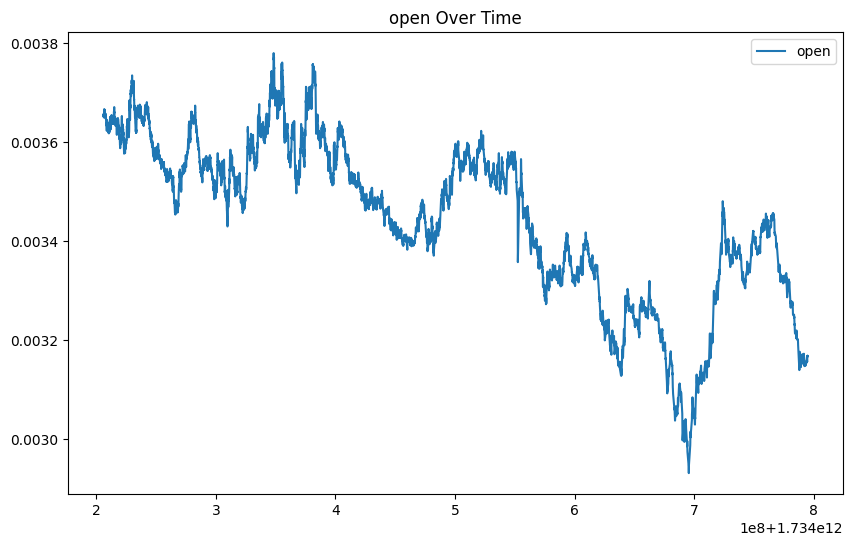

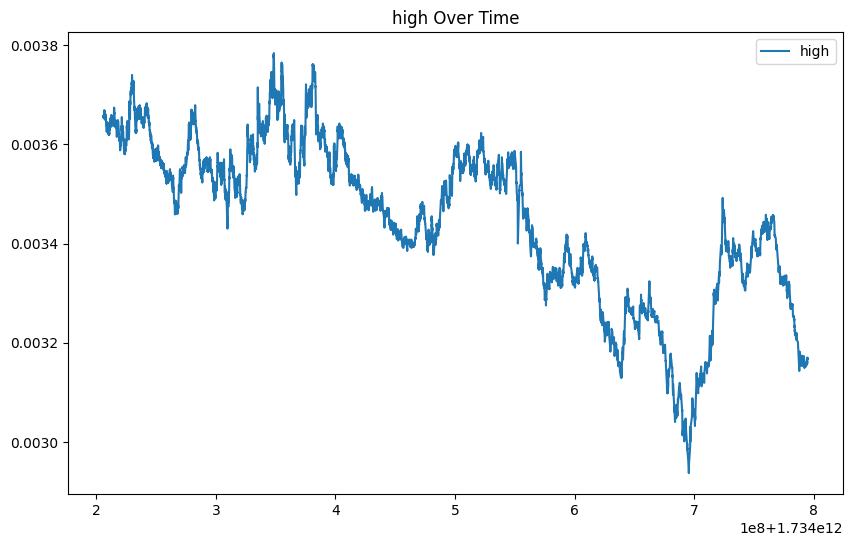

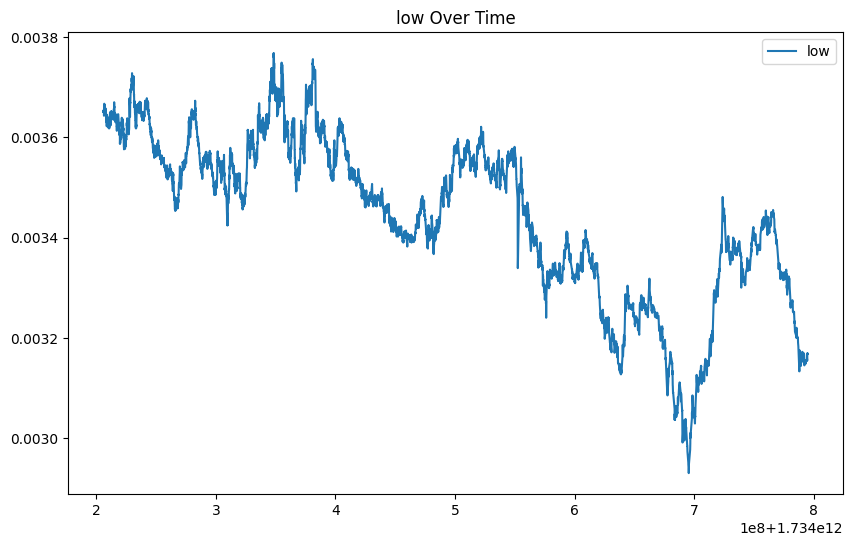

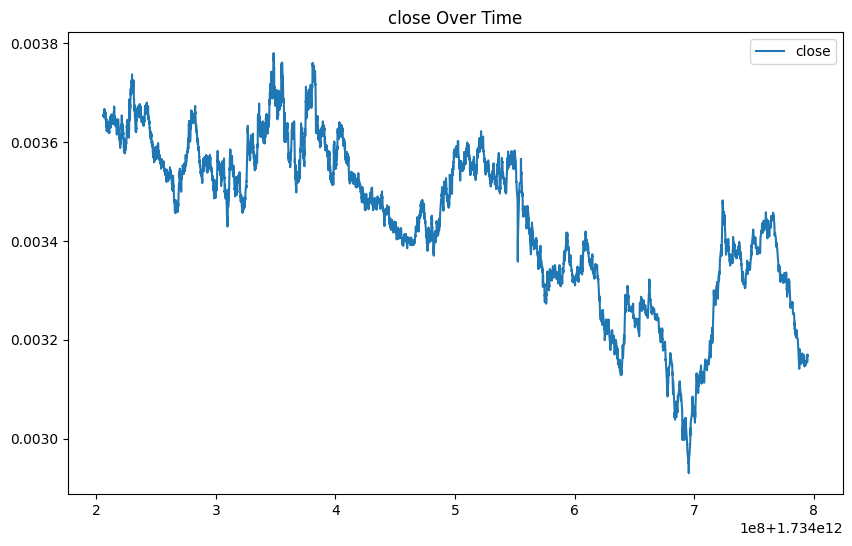

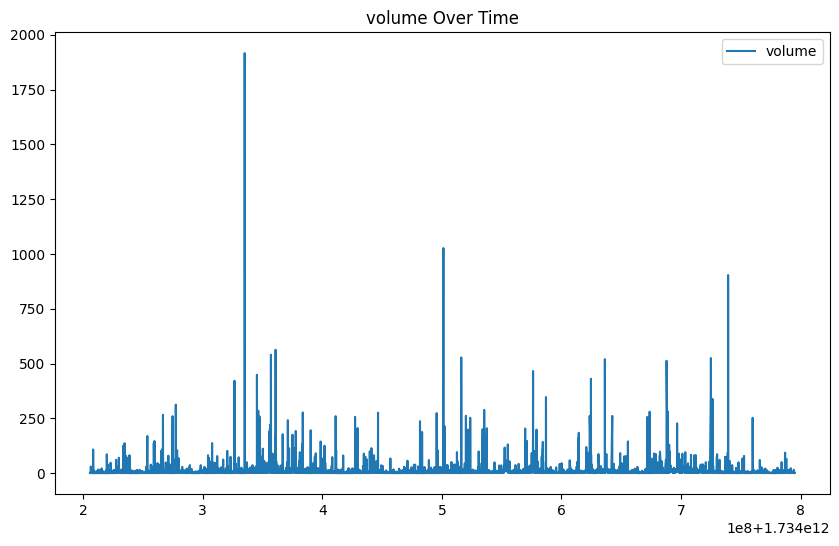

Metadata saved successfully!


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume `data_dict` contains the symbol data
symbol = 'AAVEBTC'
df = data_dict[symbol]

# Step 1: Inspect Data
print(df.info())
print(df.describe())

# Step 2: Add Percent Change Columns
df['pct_change_open_close'] = ((df['close'] - df['open']) / df['open']) * 100
df['pct_change_high_low'] = ((df['high'] - df['low']) / df['low']) * 100

# Step 3: Identify Anomalies with IQR
anomalies = {}
for col in ['open', 'high', 'low', 'close', 'volume', 'buy_volume']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    anomalies[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Step 4: Volume Anomalies
volume_anomalies = df[df['buy_volume'] > 1.5 * df['volume']]

# Step 5: Plot and Save Results
for col in ['open', 'high', 'low', 'close', 'volume']:
    plt.figure(figsize=(10, 6))
    plt.title(f"{col} Over Time")
    plt.plot(df['timestamp'], df[col], label=col)
    plt.legend()
    plt.show()

# Step 6: Generate Metadata
metadata = {
    "symbol": symbol,
    "columns": {},
    "rules": {
        "pct_change_thresholds": {
            "open_close": 10,
            "high_low": 10
        },
        "volume_anomalies": {
            "volume_discrepancy_threshold": 1.5
        }
    }
}

for col in ['open', 'high', 'low', 'close', 'volume', 'buy_volume']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    metadata["columns"][col] = {
        "mean": df[col].mean(),
        "std": df[col].std(),
        "iqr_range": [Q1, Q3],
        "z_threshold": 3
    }

# Save metadata as JSON
import json
with open(f"{symbol}_metadata.json", "w") as f:
    json.dump(metadata, f, indent=4)

print("Metadata saved successfully!")


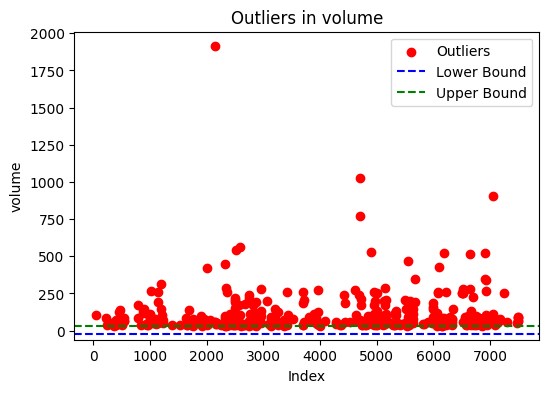

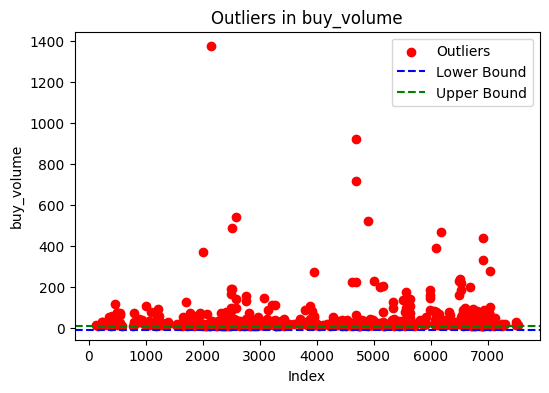

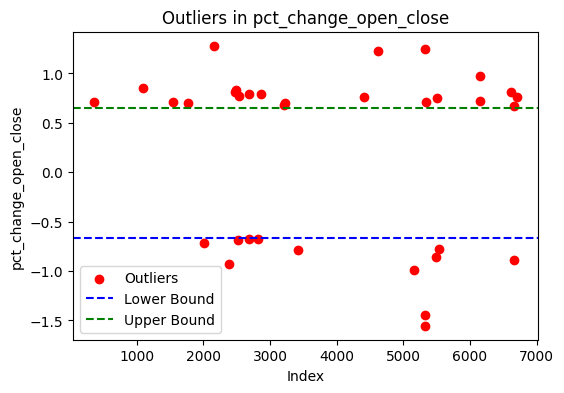

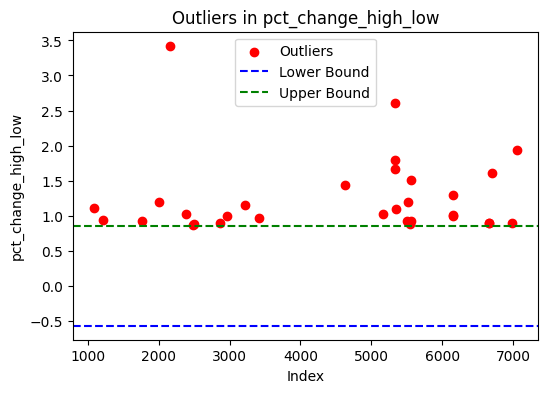

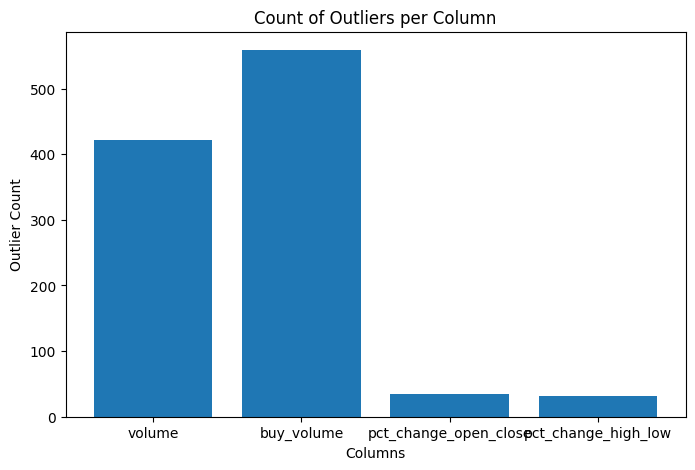

In [32]:
# Step 1: Add Percent Change Columns
df['pct_change_open_close'] = ((df['close'] - df['open']) / df['open']) * 100
df['pct_change_high_low'] = ((df['high'] - df['low']) / df['low']) * 100

# Step 2: Reassess IQR thresholds and detect outliers for relevant columns
relevant_cols = ['volume', 'buy_volume', 'pct_change_open_close', 'pct_change_high_low']
outlier_counts = {}

for col in relevant_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Use a stricter threshold for outliers
    lower_bound = Q1 - 4 * IQR
    upper_bound = Q3 + 4 * IQR
    
    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)
    
    # Plot outliers
    plt.figure(figsize=(6, 4))
    plt.title(f"Outliers in {col}")
    plt.scatter(outliers.index, outliers[col], color='red', label='Outliers')
    plt.axhline(lower_bound, color='blue', linestyle='--', label='Lower Bound')
    plt.axhline(upper_bound, color='green', linestyle='--', label='Upper Bound')
    plt.legend()
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.show()

# Step 3: Plot the counts of outliers for each relevant column
plt.figure(figsize=(8, 5))
plt.bar(outlier_counts.keys(), outlier_counts.values())
plt.title("Count of Outliers per Column")
plt.xlabel("Columns")
plt.ylabel("Outlier Count")
plt.show()



volume:
Shapiro-Wilk Test: p-value = 5.835244885835516e-102
Kolmogorov-Smirnov Test: p-value = 0.0


/usr/local/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7555.
  res = hypotest_fun_out(*samples, **kwds)


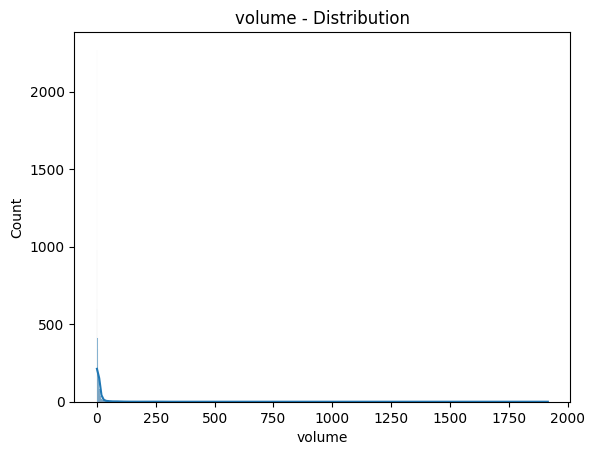

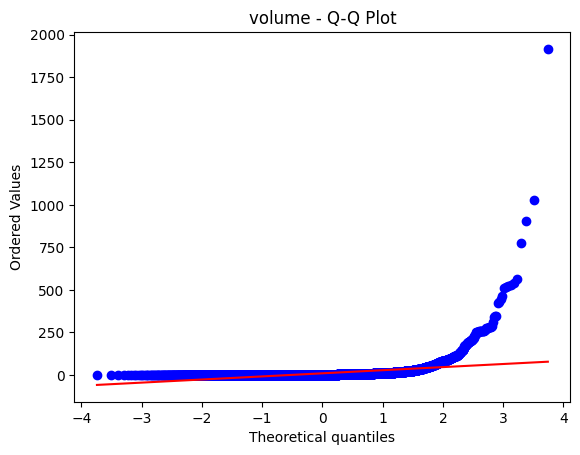


buy_volume:
Shapiro-Wilk Test: p-value = 5.573745475559636e-104
Kolmogorov-Smirnov Test: p-value = 0.0


/usr/local/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7555.
  res = hypotest_fun_out(*samples, **kwds)


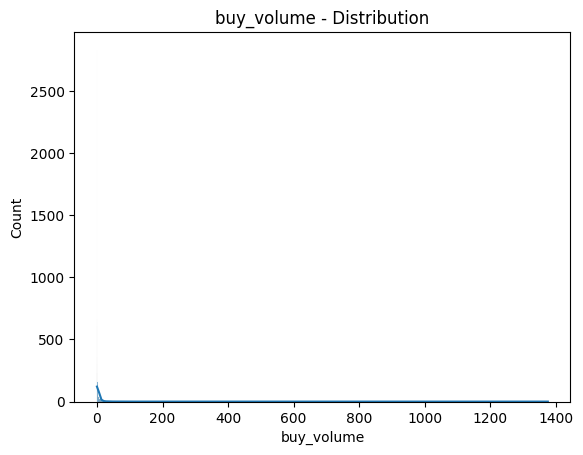

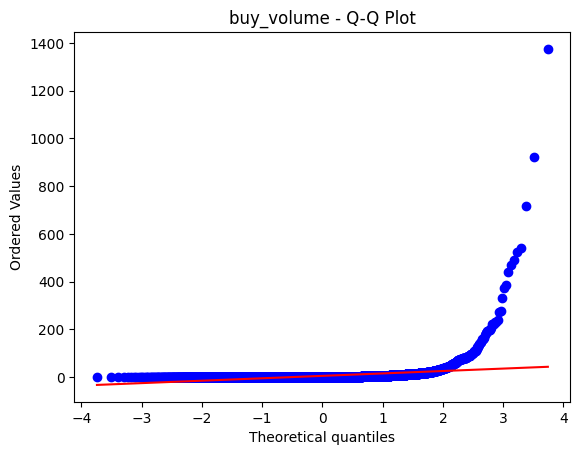


pct_change_open_close:
Shapiro-Wilk Test: p-value = 1.3112875494722456e-49
Kolmogorov-Smirnov Test: p-value = 6.355786927803409e-73


/usr/local/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7555.
  res = hypotest_fun_out(*samples, **kwds)


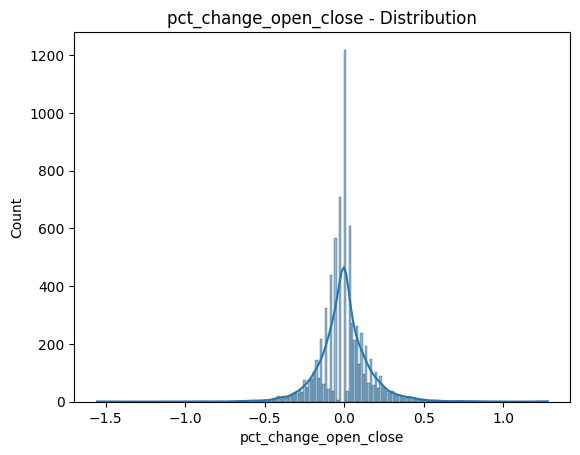

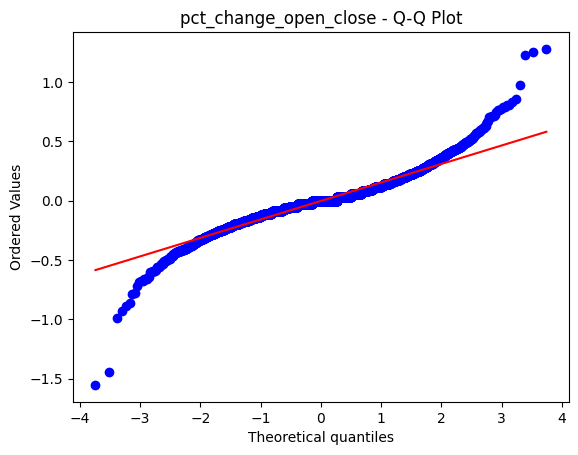


pct_change_high_low:
Shapiro-Wilk Test: p-value = 2.1456846580668543e-72
Kolmogorov-Smirnov Test: p-value = 1.5501531557003887e-119


/usr/local/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7555.
  res = hypotest_fun_out(*samples, **kwds)


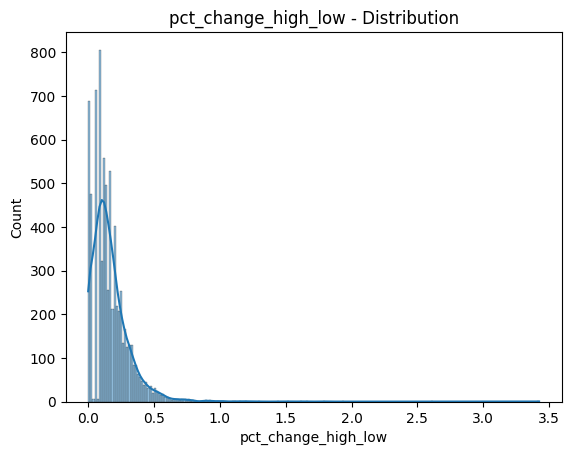

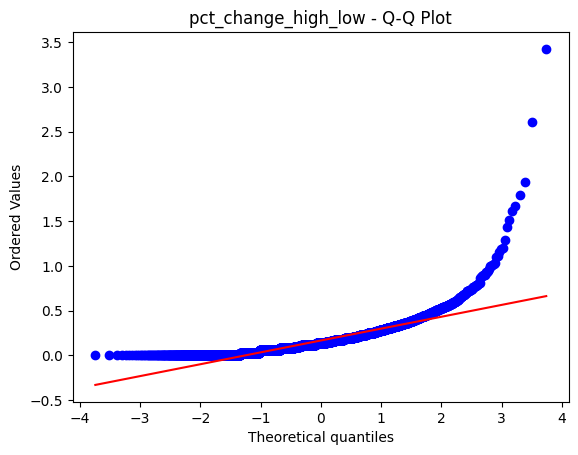

In [33]:
from scipy.stats import shapiro, kstest, normaltest
import seaborn as sns

# Test and plot for each relevant column
relevant_cols = ['volume', 'buy_volume', 'pct_change_open_close', 'pct_change_high_low']

for col in relevant_cols:
    print(f"\n{col}:")
    
    # Shapiro-Wilk Test
    stat, p = shapiro(df[col])
    print(f"Shapiro-Wilk Test: p-value = {p}")
    
    # Kolmogorov-Smirnov Test
    stat, p = kstest(df[col], 'norm', args=(df[col].mean(), df[col].std()))
    print(f"Kolmogorov-Smirnov Test: p-value = {p}")
    
    # Plot histogram and Q-Q plot
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} - Distribution")
    plt.show()

    from scipy.stats import probplot
    probplot(df[col], dist="norm", plot=plt)
    plt.title(f"{col} - Q-Q Plot")
    plt.show()


In [34]:
from scipy.stats import skew, kurtosis

for col in relevant_cols:
    print(f"{col}:")
    print(f"  Skewness: {skew(df[col])}")
    print(f"  Kurtosis: {kurtosis(df[col])}")


volume:
  Skewness: 19.96219701684327
  Kurtosis: 680.4181278376291
buy_volume:
  Skewness: 24.55152050892805
  Kurtosis: 873.2834157846341
pct_change_open_close:
  Skewness: 0.18422165827737313
  Kurtosis: 6.389074222980428
pct_change_high_low:
  Skewness: 4.039693050545716
  Kurtosis: 49.82985625691414


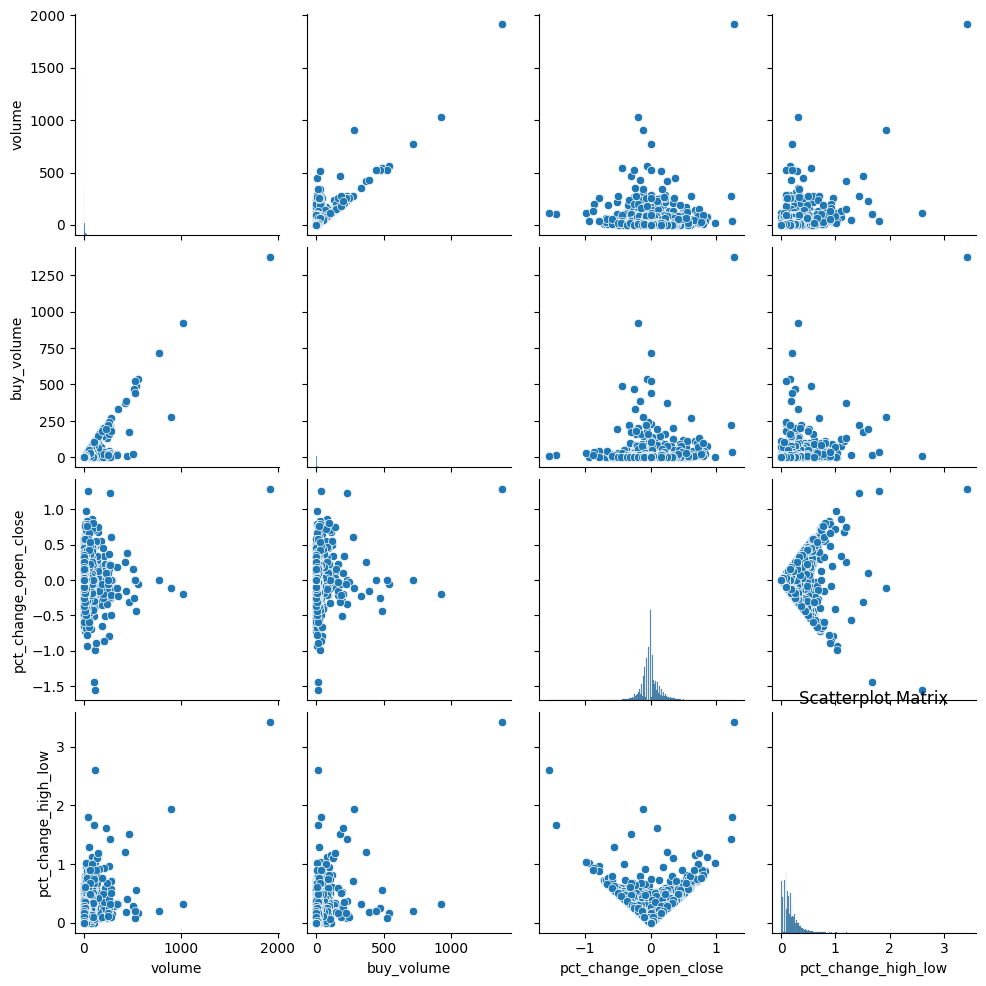

In [35]:
import seaborn as sns

# Pairplot to check relationships and clustering
sns.pairplot(df[relevant_cols])
plt.title("Scatterplot Matrix")
plt.show()


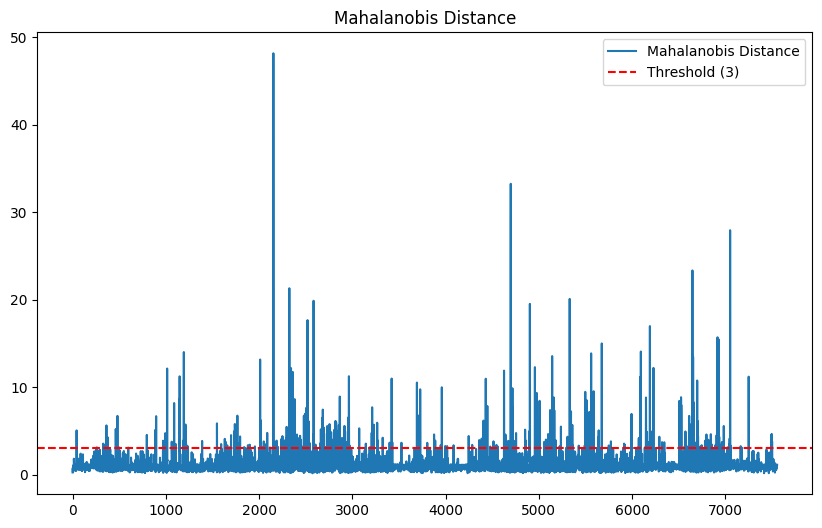

In [36]:
import numpy as np
from scipy.spatial.distance import mahalanobis
from numpy.linalg import inv

# Compute Mahalanobis distance
data = df[relevant_cols].dropna()
mean_vec = data.mean(axis=0)
cov_matrix = np.cov(data, rowvar=False)
inv_cov_matrix = inv(cov_matrix)

distances = []
for i in range(len(data)):
    dist = mahalanobis(data.iloc[i], mean_vec, inv_cov_matrix)
    distances.append(dist)

# Plot the distances
plt.figure(figsize=(10, 6))
plt.plot(distances, label="Mahalanobis Distance")
plt.axhline(y=3, color='r', linestyle='--', label="Threshold (3)")
plt.title("Mahalanobis Distance")
plt.legend()
plt.show()


In [43]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import mahalanobis
from numpy.linalg import inv

# Filter relevant columns and drop NaN
data = df[['volume', 'buy_volume', 'pct_change_open_close', 'pct_change_high_low']].dropna()

# Compute mean and covariance matrix
mean_vec = data.mean(axis=0)
cov_matrix = np.cov(data, rowvar=False)
inv_cov_matrix = inv(cov_matrix)

# Calculate Mahalanobis distance
distances = []
for i in range(len(data)):
    dist = mahalanobis(data.iloc[i], mean_vec, inv_cov_matrix)
    distances.append(dist)

# Add distances to dataframe
data['mahalanobis_distance'] = distances
data['timestamp'] = pd.to_datetime(df['timestamp'].iloc[data.index], unit='ms')

# Filter outliers with a threshold (e.g., >3)
threshold = 5
outliers = data[data['mahalanobis_distance'] > threshold]

# Sort outliers by distance in descending order
outliers_sorted = outliers.sort_values(by='mahalanobis_distance', ascending=False)

# Output timestamps and distances
timestamps_sorted = outliers_sorted[['timestamp', 'mahalanobis_distance']]
print(timestamps_sorted)

# Optionally save results to a file
timestamps_sorted.to_csv('mahalanobis_outliers.csv', index=False)


               timestamp  mahalanobis_distance
2153 2024-12-16 07:44:00             48.158829
4698 2024-12-18 05:54:00             33.241502
7050 2024-12-21 00:03:00             27.938094
4697 2024-12-18 05:53:00             26.028618
6646 2024-12-20 09:45:00             23.342007
...                  ...                   ...
5641 2024-12-19 05:00:00              5.070146
2852 2024-12-16 19:23:00              5.059745
43   2024-12-14 20:32:00              5.058776
4901 2024-12-18 10:01:00              5.022506
6218 2024-12-19 20:48:00              5.002475

[138 rows x 2 columns]


In [ ]:
timestamps_sorted.sort_values(by='timestamp', ascending=False).head(30)



Cluster 0:
               timestamp  mahalanobis_distance
2680 2024-12-16 16:31:00              6.521787
2681 2024-12-16 16:32:00              5.813502
2683 2024-12-16 16:34:00              7.439972

Cluster 1:
               timestamp  mahalanobis_distance
2852 2024-12-16 19:23:00              5.059745
2854 2024-12-16 19:25:00              5.438490
2855 2024-12-16 19:26:00              5.679457

Cluster 2:
               timestamp  mahalanobis_distance
2958 2024-12-16 21:09:00              6.559844
2962 2024-12-16 21:13:00              6.251120
2963 2024-12-16 21:14:00             11.250455

Cluster 3:
               timestamp  mahalanobis_distance
4696 2024-12-18 05:52:00              8.352818
4697 2024-12-18 05:53:00             26.028618
4698 2024-12-18 05:54:00             33.241502

Cluster 4:
               timestamp  mahalanobis_distance
5329 2024-12-18 20:07:00             14.125656
5330 2024-12-18 20:08:00             20.088463
5331 2024-12-18 20:09:00             13.536958


/tmp/ipykernel_506631/2230101569.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['timestamp_numeric'] = (pd.to_datetime(outliers['timestamp']) - pd.to_datetime(outliers['timestamp'].iloc[0])).dt.total_seconds()
/tmp/ipykernel_506631/2230101569.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['cluster'] = dbscan.fit_predict(features)


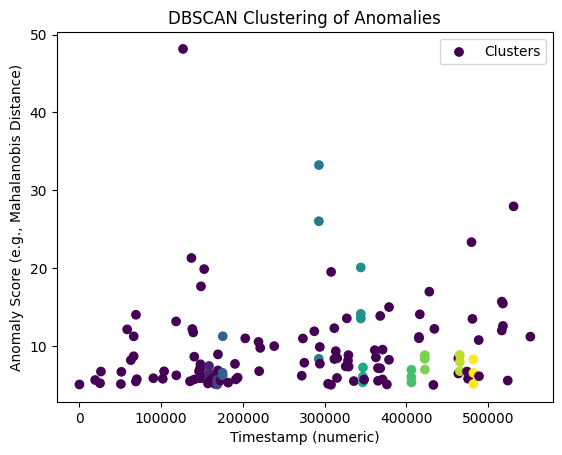

In [45]:
from sklearn.cluster import DBSCAN
import numpy as np

# Assuming 'outliers' DataFrame contains anomalous rows with 'timestamp' and 'mahalanobis_distance'

# Convert timestamps to numerical values (e.g., seconds since start)
outliers['timestamp_numeric'] = (pd.to_datetime(outliers['timestamp']) - pd.to_datetime(outliers['timestamp'].iloc[0])).dt.total_seconds()

# Extract features for clustering (use timestamps and distances)
features = outliers[['timestamp_numeric', 'mahalanobis_distance']].values

# Apply DBSCAN
eps = 300  # 300 seconds (5 minutes) threshold for clustering
min_samples = 3  # Minimum 3 anomalies to form a cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
outliers['cluster'] = dbscan.fit_predict(features)

# Identify clusters
clusters = outliers[outliers['cluster'] != -1].groupby('cluster')

# Analyze each cluster
for cluster_id, group in clusters:
    print(f"\nCluster {cluster_id}:")
    print(group[['timestamp', 'mahalanobis_distance']])

# Plot clusters
import matplotlib.pyplot as plt

plt.scatter(outliers['timestamp_numeric'], outliers['mahalanobis_distance'], c=outliers['cluster'], cmap='viridis', label='Clusters')
plt.title("DBSCAN Clustering of Anomalies")
plt.xlabel("Timestamp (numeric)")
plt.ylabel("Anomaly Score (e.g., Mahalanobis Distance)")
plt.legend()
plt.show()


/tmp/ipykernel_506631/1946098250.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['timestamp_numeric'] = (pd.to_datetime(outliers['timestamp']) - pd.to_datetime(outliers['timestamp'].iloc[0])).dt.total_seconds()
/tmp/ipykernel_506631/1946098250.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['rolling_anomaly_count'] = outliers['timestamp_numeric'].rolling(window=window_size, min_periods=1).count()


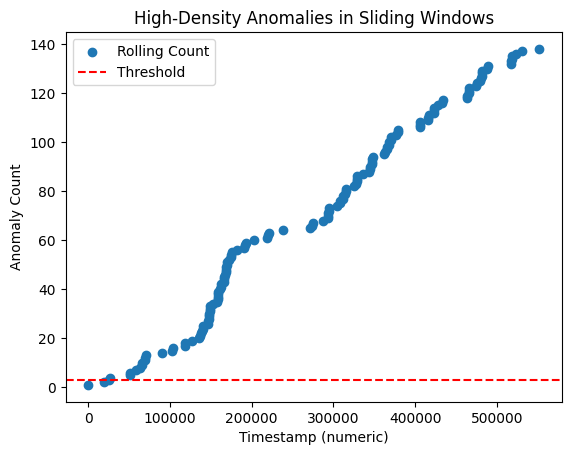

               timestamp  rolling_anomaly_count
481  2024-12-15 03:50:00                    4.0
886  2024-12-15 10:37:00                    5.0
896  2024-12-15 10:47:00                    6.0
1014 2024-12-15 12:45:00                    7.0
1089 2024-12-15 14:00:00                    8.0
...                  ...                    ...
6927 2024-12-20 20:25:00                  134.0
6928 2024-12-20 20:26:00                  135.0
6982 2024-12-20 22:04:00                  136.0
7050 2024-12-21 00:03:00                  137.0
7249 2024-12-21 05:45:00                  138.0

[135 rows x 2 columns]


In [47]:
# Define window size (e.g., 5 minutes in seconds)
window_size = 300

# Convert timestamps to seconds
outliers['timestamp_numeric'] = (pd.to_datetime(outliers['timestamp']) - pd.to_datetime(outliers['timestamp'].iloc[0])).dt.total_seconds()

# Create a rolling anomaly count
outliers['rolling_anomaly_count'] = outliers['timestamp_numeric'].rolling(window=window_size, min_periods=1).count()

# Flag high-density windows
threshold = 3  # Adjust based on your definition of "high-density"
high_density = outliers[outliers['rolling_anomaly_count'] > threshold]

# Plot high-density anomalies
plt.scatter(outliers['timestamp_numeric'], outliers['rolling_anomaly_count'], label='Rolling Count')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
plt.title("High-Density Anomalies in Sliding Windows")
plt.xlabel("Timestamp (numeric)")
plt.ylabel("Anomaly Count")
plt.legend()
plt.show()

# Print high-density anomaly sequences
print(high_density[['timestamp', 'rolling_anomaly_count']])


In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from collections import deque
from numpy.linalg import inv

class RealTimeClusterDetector:
    def __init__(self, window_size=100, eps=300, min_samples=3):
        self.window = deque(maxlen=window_size)  # Sliding window to hold recent points
        self.eps = eps  # Maximum distance for DBSCAN clustering
        self.min_samples = min_samples  # Minimum points required to form a cluster

    def add_point(self, timestamp, data_point):
        # Add new data point to sliding window (timestamp + numeric features)
        self.window.append((timestamp, data_point))

    def calculate_mahalanobis(self, point, data):
        # Ensure all inputs are numeric arrays
        data = np.array(data)
        
        # Check if we have enough points to calculate covariance matrix
        if data.shape[0] -1 < data.shape[1]:  # Not enough rows to compute covariance
            return np.nan  # Return NaN for this score
        

        mean_vec = np.mean(data, axis=0)
        try:
            cov_matrix = np.cov(data, rowvar=False)
        except Exception as e:
            #print(f"Error calculating covariance matrix: {e}")
            return np.nan
        
        inv_cov_matrix = inv(cov_matrix + np.eye(cov_matrix.shape[0]) * 1e-9)  # Avoid singular matrix
        diff = point - mean_vec
        return np.sqrt(diff.T @ inv_cov_matrix @ diff)

    def detect_clusters(self):
        # If not enough data, return None
        if len(self.window) < self.min_samples:
            return None

        # Extract numeric features and timestamps separately
        timestamps, features = zip(*self.window)
        features = np.array(features)

        # Compute Mahalanobis distances for all points in the window
        mahalanobis_scores = np.array([
            self.calculate_mahalanobis(features[i], np.delete(features, i, axis=0)) for i in range(len(features))
        ])

        # Combine timestamps and Mahalanobis scores for clustering
        features_with_scores = np.column_stack((timestamps, mahalanobis_scores))

        # Remove rows with NaN Mahalanobis scores (caused by insufficient data)
        features_with_scores = features_with_scores[~np.isnan(features_with_scores[:, 1])]

        # Apply DBSCAN if there are enough points left
        if len(features_with_scores) >= self.min_samples:
            dbscan = DBSCAN(eps=self.eps, min_samples=self.min_samples, metric='euclidean')
            labels = dbscan.fit_predict(features_with_scores)

            # Extract the most recent cluster if any
            clusters = {}
            for cluster_id in np.unique(labels):
                if cluster_id != -1:  # Exclude noise
                    clusters[cluster_id] = features_with_scores[labels == cluster_id]
            return clusters

        return None

    def print_most_recent_cluster(self):
        clusters = self.detect_clusters()
        if not clusters:
            #print("No clusters detected.")
            return None
        else:
            # Find the most recent cluster (highest timestamp)
            most_recent_cluster = max(clusters.values(), key=lambda c: np.max(c[:, 0]))
            #print("Most recent cluster detected:")
            print(pd.DataFrame(most_recent_cluster, columns=["Timestamp", "Mahalanobis Score"]))

# Simulate data streaming
def stream_data(df, detector):
    for _, row in df.iterrows():
        timestamp = row['timestamp']
        data_point = row[['volume', 'buy_volume', 'pct_change_open_close', 'pct_change_high_low']].values

        # Add point to the detector and check for clusters
        detector.add_point(timestamp, data_point)
        detector.print_most_recent_cluster()

# Example Usage
detector = RealTimeClusterDetector(window_size=100, eps=300, min_samples=3)
stream_data(df, detector)
